Заменой переменных можно свести интегрирование к некоторому интервалу, тогда будем рассматривать вычисление несобственного интеграла с особенностью в левой точке интегрвала. Другие типы особенностей могут быть сведены к этой используя подходящие замены.

$$\int_a^b f(x) dx, \quad \lim_{x \to a} f(x) = \infty$$

Идея очень простая -- проинтегрировать аналитически особенность в окрестности точки $a$. Для этого нужно представить подынтегральную функцию в степенном виде.

Вне этого интервала с особенностью интеграл считается с использованием стандартных методов.

__Рассмотрим:__
$$\int_0^1 \frac{\cos x}{\sqrt x} dx$$
Отделяем окрестность особенности:
$$\int_0^1 \frac{\cos x}{\sqrt x} dx = \int_0^{\delta}\frac{\cos x}{\sqrt{x}}dx + \int_{\delta}^1\frac{\cos x}{\sqrt{x}}dx = I_1 + I_2$$

$$I_1 = \int_0^{\delta}\frac{\cos x}{\sqrt{x}}dx$$
$$\frac{\cos x}{\sqrt{x}} \approx \frac{1 - x^2/2 + x^4/24}{\sqrt{x}}$$
Проинтегрируем
$$I_1 \approx 2\sqrt{\delta} - \frac{\delta^{5/2}}{5} + \frac{\delta^{9/2}}{108}$$
При этом ошибку можно оценить следующим слагаемым в ряде $\varepsilon_1$.

Для вычисления второго интеграла воспользуемся формулой прямоугольников, например.

### Сравните ошибку вычисления $I_1$, $I_2$, получите суммарную ошибку метода. Постройте зависимость погрешности от точки разбиения $\delta$. Оцените шаг сетки $h$.

Другой способ -- разбивать не отрезок, а подынтегральную функцию на 2 части
$$\int_{a}^bf(x)dx =  \int_{a}^bf\phi(x)dx + \int_{a}^b[f(x) - \phi(x)]dx$$

- $\phi(x)$ интегрируется аналитически, особенность тут
- $\phi(x) - f(x)$ не содержит особенности
- $\phi(x) - f(x)$ достаточно гладкая для квадратурных формул.

$$\int_0^1\frac{\cos x}{\sqrt x}dx = \int_0^1\frac{1}{\sqrt{x}}dx + \int_0^1\frac{\cos x - 1}{\sqrt{x}}dx = 2 + \int_0^1\frac{\cos x - 1}{\sqrt{x}}dx$$
Доопределив в нуле нулем новая подыинтегральная не содержит особенности.

### Оцените погрешность метода Симпсона

Можно сильнее регуляризовать, дополнительно вычтя недифференцируемую часть.

### Оцените погрешность метода Симпсона в этом случае

# Вероятностный подход к интегрированию

Мотивация: квадратурные формулы для больших размерностей, произвольных областей обобщать сложно.

Давайте рассмотрим простейший случай: подыинтегральная функция одномерная и ограничена, для простоты:

$$f(x) \in [0, 1], \quad x \in [0, 1]$$

Можно приблизительно посчитать площадь под графиком так: набросать случайно точки из равномерного распределения на $[0, 1]\times [0, 1]$ и просуммировать те, что лежат ниже нашей функции $f$, тогда интеграл можно вычистить как число точек под функцией к общему числу точек.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    return np.sin(x*np.pi)

f.exact_val = 1.0/np.pi*(-np.cos(np.pi) + np.cos(0))

def MC_integr(f, n=2**12):
    plot_x = np.linspace(0, 1, 2**10)


    Xset = np.random.rand(n, 2)
    idx_under = f(Xset[:, 0]) > Xset[:, 1]
    approx_val = float(len(Xset[idx_under]))/len(Xset)
    error = np.abs(approx_val - f.exact_val)

    plt.figure(figsize=(10,6))
    plt.plot(plot_x, f(plot_x))
    
    plt.plot(Xset[idx_under, 0], Xset[idx_under, 1], 'r.', Xset[~idx_under, 0], Xset[~idx_under, 1], 'k.', ms=2);
    plt.title('Number of points $n=${}'.format(n))
    print("I ≈ {}, exact value = {},error = {}".format(approx_val , f.exact_val, error ) )

I ≈ 0.63720703125, exact value = 0.6366197723675814,error = 0.0005872588824186176


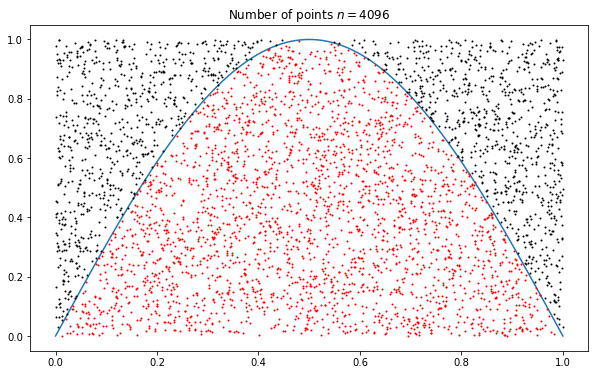

In [2]:
MC_integr(f, n=2**12)

In [3]:
def MC_error(f, Xset):
    idx_under = f(Xset[:, 0]) > Xset[:, 1]
    return np.abs(float(len(Xset[idx_under]))/len(Xset) - f.exact_val)

errors = np.array([(N**2, MC_error(f, np.random.rand(N**2, 2)) ) for N in range(3, 1000, 10)])


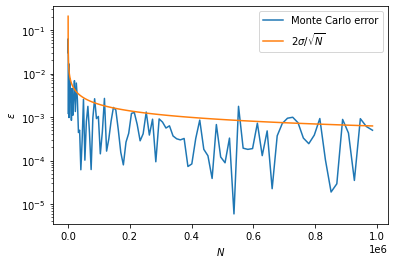

In [4]:
plt.plot(errors[:, 0], errors[:, 1], errors[:, 0], 2*0.31/errors[:, 0]**0.5)
plt.xlabel('$N$')
plt.ylabel('$\epsilon$')
plt.yscale('log')
plt.legend(['Monte Carlo error', r'$2\sigma/\sqrt{N}$']);

Это ни что иное как метод Монте-Карло

$$\int f(x) dx = \int {\bf 1}_D dxdy =\approx \frac{1}{N}\sum_{i = 1}^N {\bf 1}_D$$

В общем случа 
$$\int_D f(x)p(x)dx \approx \frac{1}{N}\sum_{i = 1}^N f(x_i), \quad x_i \sim p(x)$$

### Найти матожидание и дисперсию оценки используя ЦПТ

Как уменьить ошибку?

- Можно изменить генерацию псевдослучайных чисел (последовательности Хальтона)
- Можно использовать importance sampling

# Importance sampling

Идея: больший вклад в интеграл от точек, в которых функция имеет большие значения, тогда надо использовать распределение, для которого плотность будет длизка к функции, т.е. основная масса находится примерно в точках где функция будет давать наибольший вклад в интеграл.

$$\mathbb{E}_p\frac{f}{p} = \int f(x)dx$$

Тогда все что нам нужно -- уметь сэмплить из распределения, inverce sampling & MCMC

__inverce sampling__ $F(x) \sim U[0, 1]$

__Markov Chain Monte Carlo__: ситорим Марковскую цепь, со стационарным распределением, из котророго надо сэмплить, есть методы для этого, которые требуют только знания плотности, запускаем метод такой, строим некоторый большой начальный кусок (ждем стационарности), генерируем нужное количество сэмплов, выкидываем начало.

### Реализуйте импортанс сэмплинг, если известно фнукция распределения

__Может быть мотивирующий пример__

Пусть дана регрессионная задача, т.е. $\{x_i,~y_i\}_{i = 1}^N$,
$$y = f(x) + \varepsilon, \varepsilon \sim~N(0, 1)$$

__МНК!__
$$y_i = x_i^{\top}b + \varepsilon$$

Но что если хотим не только линейный зависимости? использовать функции некоторые ?

Существует такая штука как Гильбертово пространство воспроизводящего ядра:
$$f(x) = \langle k(x, \cdot), f\rangle$$

утверждается, что $f = \sum\alpha_i k(x, x_i)$, тогда надо обращать какую матрицу ? А что есть сэмплов $10^6$?

Многие ядра в таких задачах положительно определенные и инвариантны относительно сдвига, тогда:

$$k(x, y) = k(x - y) = \int e^{i(x - y)^{\top}w} dF(w)$$

А давайте применим импортанс сэмплинг! Тогда ядро можно предсавить как скаларное произведение двух векторов признаков.

$$\alpha = K = k(x_i, x_j)^{-1}y = (\Phi^{\top}\Phi)^{-1}y$$

$$\Phi^{\top}\Phi \alpha = y$$
$$\Phi \Phi^{\top}\Phi \alpha = \Phi y$$

$$f(x) = \phi^{\top}(x)\Phi \alpha = \phi^{\top}(x) (\Phi \Phi^{\top})^{-1}\Phi y$$

Самое дорогое -- обращение, $O(n^3) \to O(d^3)$, выгодно, если в приближении интеграла использовать много меньше сэмплов, чем в изначальной постановке задачи (__Random Fourier Kernel Regression__)